# Non-Profit Org donation income by month

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

monthly_donations = "donation_data.csv"
donation_data = pd.read_csv(monthly_donations)

In [2]:
donation_data.head()

,FY,April,May,June,July,August,September,October,November,December,January,Februay,March
0,FY15,"$10,186.46","$1,401.27","$5,227.32","$8,971.53","$14,566.87","$6,401.00","$4,301.00",$899.93,"$13,723.05","$20,355.00","$1,006.50","$11,441.38"
1,FY16,"$13,142.04","$3,411.41","$7,615.61","$19,220.64","$5,928.25","$18,355.00","$5,921.23","$19,196.30","$25,008.29","$3,616.66","$4,207.51","$12,504.90"
2,FY17,"$15,958.20","$7,640.55","$7,741.50","$10,241.60","$5,387.55","$8,101.91","$80,701.15","$12,063.94","$11,937.71","$7,866.00","$8,526.81","$8,298.20"
3,FY18,"$25,398.18","$6,634.32","$17,131.36","$9,936.50","$8,769.53","$77,415.00","$6,444.19","$9,070.67","$38,717.80","$4,461.70","$4,063.13","$20,382.79"
4,FY19,"$28,576.33","$4,721.55","$3,573.14","$8,591.17","$11,444.92","$69,055.56","$32,943.97","$6,015.42","$18,838.74","$3,472.01","$4,717.02","$14,472.35"


In [3]:
donation_data.dtypes

FY           object
April        object
May          object
June         object
July         object
August       object
September    object
October      object
November     object
December     object
January      object
Februay      object
March        object
dtype: object

In [4]:
df = donation_data.set_index(['FY'])
df = df.rename(columns={"Februay":"February"})
df

,April,May,June,July,August,September,October,November,December,January,February,March
FY,,,,,,,,,,,,
FY15,"$10,186.46","$1,401.27","$5,227.32","$8,971.53","$14,566.87","$6,401.00","$4,301.00",$899.93,"$13,723.05","$20,355.00","$1,006.50","$11,441.38"
FY16,"$13,142.04","$3,411.41","$7,615.61","$19,220.64","$5,928.25","$18,355.00","$5,921.23","$19,196.30","$25,008.29","$3,616.66","$4,207.51","$12,504.90"
FY17,"$15,958.20","$7,640.55","$7,741.50","$10,241.60","$5,387.55","$8,101.91","$80,701.15","$12,063.94","$11,937.71","$7,866.00","$8,526.81","$8,298.20"
FY18,"$25,398.18","$6,634.32","$17,131.36","$9,936.50","$8,769.53","$77,415.00","$6,444.19","$9,070.67","$38,717.80","$4,461.70","$4,063.13","$20,382.79"
FY19,"$28,576.33","$4,721.55","$3,573.14","$8,591.17","$11,444.92","$69,055.56","$32,943.97","$6,015.42","$18,838.74","$3,472.01","$4,717.02","$14,472.35"
FY20,"$25,885.48","$9,652.82","$28,958.72","$5,612.86","$4,206.09","$36,681.30","$34,069.73","$4,782.28","$20,204.97","$4,435.72","$4,275.70","$12,302.85"


In [5]:
df[df.columns[0:]] = df[df.columns[0:]].replace('[\$,]', '', regex=True).astype(float)
df

,April,May,June,July,August,September,October,November,December,January,February,March
FY,,,,,,,,,,,,
FY15,10186.46,1401.27,5227.32,8971.53,14566.87,6401.00,4301.00,899.93,13723.05,20355.00,1006.50,11441.38
FY16,13142.04,3411.41,7615.61,19220.64,5928.25,18355.00,5921.23,19196.30,25008.29,3616.66,4207.51,12504.90
FY17,15958.20,7640.55,7741.50,10241.60,5387.55,8101.91,80701.15,12063.94,11937.71,7866.00,8526.81,8298.20
FY18,25398.18,6634.32,17131.36,9936.50,8769.53,77415.00,6444.19,9070.67,38717.80,4461.70,4063.13,20382.79
FY19,28576.33,4721.55,3573.14,8591.17,11444.92,69055.56,32943.97,6015.42,18838.74,3472.01,4717.02,14472.35
FY20,25885.48,9652.82,28958.72,5612.86,4206.09,36681.30,34069.73,4782.28,20204.97,4435.72,4275.70,12302.85


In [6]:
df.dtypes

April        float64
May          float64
June         float64
July         float64
August       float64
September    float64
October      float64
November     float64
December     float64
January      float64
February     float64
March        float64
dtype: object

In [7]:
df = df[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']] 
df

,January,February,March,April,May,June,July,August,September,October,November,December
FY,,,,,,,,,,,,
FY15,20355.00,1006.50,11441.38,10186.46,1401.27,5227.32,8971.53,14566.87,6401.00,4301.00,899.93,13723.05
FY16,3616.66,4207.51,12504.90,13142.04,3411.41,7615.61,19220.64,5928.25,18355.00,5921.23,19196.30,25008.29
FY17,7866.00,8526.81,8298.20,15958.20,7640.55,7741.50,10241.60,5387.55,8101.91,80701.15,12063.94,11937.71
FY18,4461.70,4063.13,20382.79,25398.18,6634.32,17131.36,9936.50,8769.53,77415.00,6444.19,9070.67,38717.80
FY19,3472.01,4717.02,14472.35,28576.33,4721.55,3573.14,8591.17,11444.92,69055.56,32943.97,6015.42,18838.74
FY20,4435.72,4275.70,12302.85,25885.48,9652.82,28958.72,5612.86,4206.09,36681.30,34069.73,4782.28,20204.97


In [8]:
FY15 = df.iloc[0]
FY16 = df.iloc[1]
FY17 = df.iloc[2]
FY18 = df.iloc[3]
FY19 = df.iloc[4]
FY20 = df.iloc[5]

In [ ]:
# FY15_array = FY15.to_list()
# FY16_array = FY16.to_list()
# FY17_array = FY17.to_list()
# FY18_array = FY18.to_list()
# FY19_array = FY19.to_list()
# FY20_array = FY20.to_list()

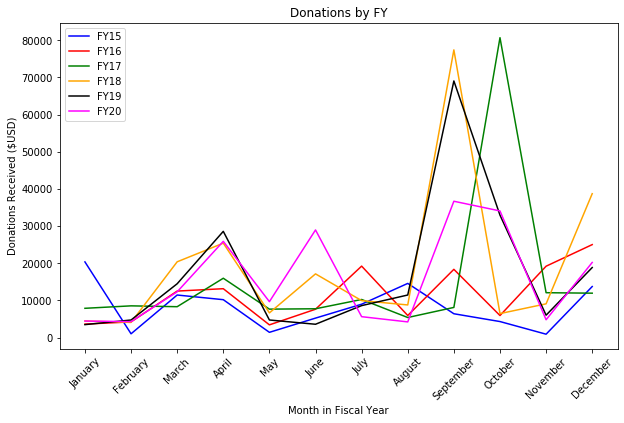

In [9]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig = plt.figure(figsize=(10,6))

plt.plot(months, FY15, color="blue", label="FY15")
plt.plot(months, FY16, color="red", label="FY16")
plt.plot(months, FY17, color="green", label="FY17")
plt.plot(months, FY18, color="orange", label="FY18")
plt.plot(months, FY19, color="black", label="FY19")
plt.plot(months, FY20, color="magenta", label="FY20")

plt.title("Donations by FY")
plt.xlabel("Month in Fiscal Year")
plt.ylabel("Donations Received ($USD)")


plt.xticks(months, rotation=45)
plt.legend(loc="upper left")

plt.savefig("./Images/fundraising_by_FY.png")
plt.show()


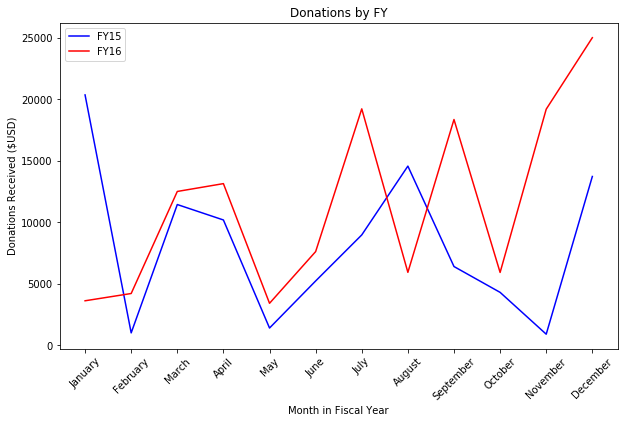

In [10]:
fig = plt.figure(figsize=(10,6))

plt.plot(months, FY15, color="blue", label="FY15")
plt.plot(months, FY16, color="red", label="FY16")


plt.title("Donations by FY")
plt.xlabel("Month in Fiscal Year")
plt.ylabel("Donations Received ($USD)")


plt.xticks(months, rotation=45)
plt.legend(loc="upper left")

plt.savefig("./Images/FY15-FY16.png")
plt.show()


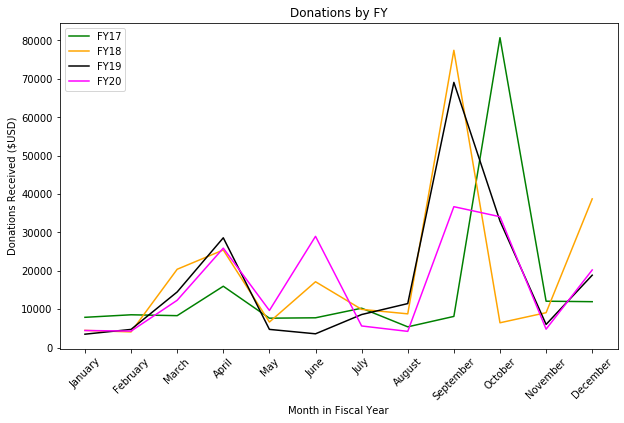

In [11]:
fig = plt.figure(figsize=(10,6))

plt.plot(months, FY17, color="green", label="FY17")
plt.plot(months, FY18, color="orange", label="FY18")
plt.plot(months, FY19, color="black", label="FY19")
plt.plot(months, FY20, color="magenta", label="FY20")

plt.title("Donations by FY")
plt.xlabel("Month in Fiscal Year")
plt.ylabel("Donations Received ($USD)")


plt.xticks(months, rotation=45)
plt.legend(loc="upper left")

plt.savefig("./Images/FY17-FY20.png")
plt.show()


In [12]:
ave_monthly = df.mean()
ave_monthly

January       7367.848333
February      4466.111667
March        13233.745000
April        19857.781667
May           5576.986667
June         11707.941667
July         10429.050000
August        8383.868333
September    36001.628333
October      27396.878333
November      8671.423333
December     21405.093333
dtype: float64

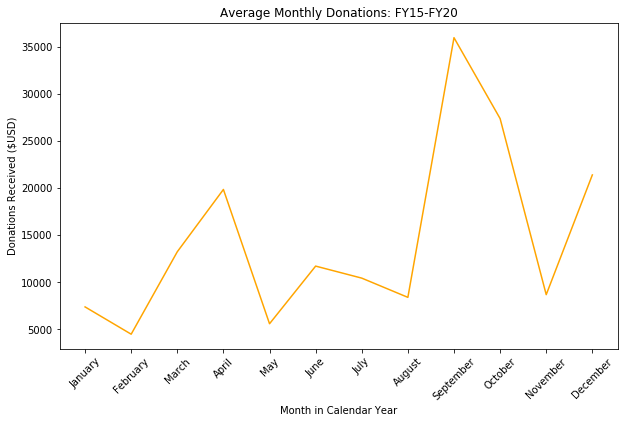

In [13]:
fig = plt.figure(figsize=(10,6))

plt.plot(months, ave_monthly, color="orange")

plt.title("Average Monthly Donations: FY15-FY20")
plt.xlabel("Month in Calendar Year")
plt.ylabel("Donations Received ($USD)")


plt.xticks(months, rotation=45)

plt.savefig("./Images/Ave_FY15-FY20.png")
plt.show()